In [253]:
import pandas as pd
import matplotlib.pyplot as plt

====== CARGAR EL DATASET =======

In [254]:
# Carga de archivos
try:
    # archivo csv con separador';' 
    df = pd.read_csv(r'C:\\Users\\ander\\Escritorio\\PYTHON\\Python 2025\\machine_learning\\datasets\\Salary_Data.csv', sep=',', encoding='utf-8-sig')
    print('✅ Archivo cargado correctamente')
except FileNotFoundError:
    print('❌ Error al cargar el archivo')

✅ Archivo cargado correctamente


In [255]:
# Información del dataset
print(f'''
    Tamaño del dataset: \n{df.shape}\n\n
    Informaciáon básica: \n{df.info}\n\n
    columnas: \n{df.columns}\n\n
    Valores nulos: \n{df.isnull().sum()}\n\n
    Valores únicos: \n{df.nunique()}\n\n
''')


    Tamaño del dataset: 
(375, 6)


    Informaciáon básica: 
<bound method DataFrame.info of       Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1             

In [256]:
# Estadísticas descriptivas
print(f' Estadística Descriptiva: \n{df.describe().T}')  # .T transpone filas con columnas

 Estadística Descriptiva: 
                     count           mean           std    min      25%  \
Age                  373.0      37.431635      7.069073   23.0     31.0   
Years of Experience  373.0      10.030831      6.557007    0.0      4.0   
Salary               373.0  100577.345845  48240.013482  350.0  55000.0   

                         50%       75%       max  
Age                     36.0      44.0      53.0  
Years of Experience      9.0      15.0      25.0  
Salary               95000.0  140000.0  250000.0  


In [257]:
# primeras columnas
df.head(5)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [258]:
# tramamiento de valores nulos
df_clean = df.dropna()


=== REGRESIÓN LINEAL SIMPLE ===

In [259]:
df_clean.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

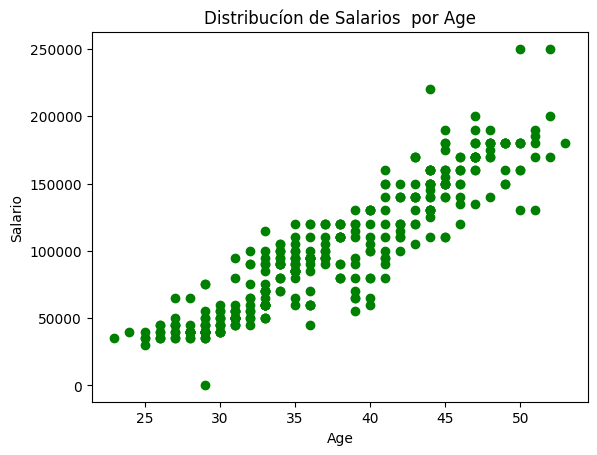

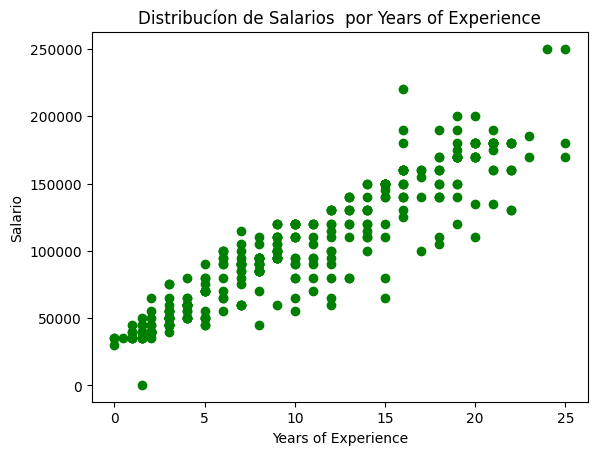

In [260]:
cols = ['Age', 'Years of Experience']
for col in cols:
    plt.plot(df_clean[col],df_clean['Salary'], 'go')
    plt.title(f'Distribucíon de Salarios  por {col}')
    plt.xlabel(col)
    plt.ylabel('Salario')
    plt.show()

In [261]:
# Importamos las librerías
# no es recomendable usar todos los datos para predecir
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score # califican el modelo de regresión

# Variable independiente
df_clean['Age']
X = df_clean[['Age']].values.reshape(-1, 1)

# Variable dependiente
y = df_clean['Salary'].values 

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')

X_train: (298, 1)
X_test: (75, 1)


In [266]:
# creamos el modelo
model = LinearRegression()
# Entrenamos el modelo
model.fit(X, y)

# Realizamos predicciones
y_predict = model.predict(X_test)

# Valores que el modelo predice en base a los datos de prueba
y_predict[:5]

array([167095.7084094 , 110448.79234386, 141919.30126916,  78978.28341856,
       135625.1994841 ])

In [267]:
# Calificación del modelo
print('Predicciones: {}, Reales: {}'.format(y_predict[:4].round(2), y_test[:4]))

Predicciones: [167095.71 110448.79 141919.3   78978.28], Reales: [180000.  65000. 125000.  80000.]


In [268]:
import numpy as np
# variables RMSE, indica que tanto varian los datos de la predicción respoect a los reales
mse = mean_squared_error(y_test, y_predict)
print(f'MSE: {mse}')
rmse = np.sqrt(mse).round(2)
print(f'RMSE: {rmse}')

r2 = r2_score(y_test, y_predict)
print(f'R2: {r2}')

MSE: 355975974.1953763
RMSE: 18867.33
R2: 0.8515271047240931


In [265]:
salary_mean = df['Salary'].mean()
print(f'Salario promedio: {salary_mean}')
rmse_percentage = (rmse / salary_mean) * 100
print(f"\nRMSE como % del salario promedio: {rmse_percentage:.1f}%")

Salario promedio: 100577.34584450402

RMSE como % del salario promedio: 18.9%
